# KNN이 잘 작동하고 작동하지 않는 케이스를 다룹니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from KNN import KNN

1) Grid 한 형식으로 균일하게 sample이 배치되어있을 때 KNN 작동하지 않는다.

    -> 즉, 가까운 sample이 항상 자신의 클래스를 대표해주지 않는다.

## 1. Grid

In [4]:
def get_data():
    width = 8
    height = 8
    
    N = width * height
    
    X = np.zeros((N, 2))
    Y = np.zeros(N)
    n = 0
    
    start_t = 0
    
    for i in range(width):
        t = start_t
        for j in range(height):
            
            X[n] = [i, j]
            Y[n] = t
            
            n += 1
            t = (t + 1) %2
            
        start_t = (start_t + 1) %2
        
    return X, Y

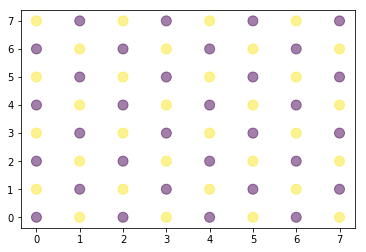

In [5]:
X, Y = get_data()

plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, alpha=0.5)
plt.show()

In [6]:
model = KNN(3)
model.fit(X, Y)
print("Train Accuracy: ", model.score(X, Y))

Train Accuracy:  0.0


## 2. XOR 문제

- 선형으로 나누기 힘들지만 KNN이 잘 작동하는 케이스

In [8]:
def get_xor():
    X = np.zeros((200, 2))
    
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5 - 1, 0.5 - 1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0 - 0.5, 0 - 0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0 - 0.5, 0.5 - 1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5 - 1, 0 -0.5)
    
    Y = np.array([0] * 100 + [1] * 100)
    return X, Y

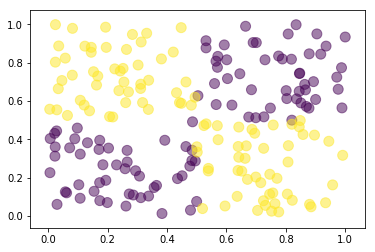

In [11]:
X, Y = get_xor()

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

In [12]:
model = KNN(3)
model.fit(X, Y)
print("Accuracy: ", model.score(X, Y))

Accuracy:  0.975


## 3. Donut 문제

In [27]:
def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner # gaussian noise
    theta = 2 * np.pi * np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer # gaussian noise
    theta = 2 * np.pi * np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

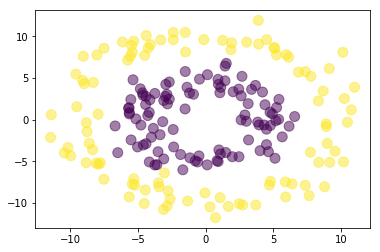

In [28]:
X, Y = get_donut()

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

In [30]:
model = KNN(3)
model.fit(X, Y)
print("Accuracy: ", model.score(X, Y))

Accuracy:  0.995
